# Music Genre Classification

In the dynamic era of music, it is really challenging to categorize music based on their genre. In this project, we tried to use two different machine learning approach for music classification. We have used (“GTZAN Dataset - Music Genre Classification”) genre collection dataset as it had a large selection of genres, covering hip-hop, jazz, rock and many others which would create a good mix for classification. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
data = pd.read_csv('features_30_sec.csv')
# print(data.info())

#label is categorical data so converting it to numerical
data['label'] = pd.factorize(data['label'])[0]

y = data['label']
# print(data['label'])
data.drop(['filename', 'label'], axis=1, inplace=True)
# print(data.head())
#checking for missing data
missing=data.isnull()
# print(missing.describe())


# KNN

Instead of performing explicit generalization, it compares new problem instances with instances seen in training, which have been stored in memory.Because computation is postponed until a new instance is observed, these algorithms are
sometimes referred to as lazy. Compare to Model-based Learning we don't need to store the data after training. It requires three things Requires three things 1)The set of labeled records 2)Distance Metric to compute distance between records 3)The value of k, the number of nearest neighbors to retrieve.

For KNN, we will be splitting our data Train-test: 70%-30% (we have small dataset around ≈1000)
We will try to find the best k value using cross validation (using both 5 and 10 folds). We have scaled data to preventdistance measures from being dominated by one of the attributes.

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score


#splitting dataset before applying KNN
X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3, random_state=17)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)


knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

#cross validation using 5 folds
knn_grid = GridSearchCV(knn_pipe, knn_params,cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_, knn_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'knn__n_neighbors': 4} 0.6471428571428571


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_, knn_grid.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'knn__n_neighbors': 4} 0.6671428571428571


# KNN with optimum K

In [6]:
from sklearn.metrics import accuracy_score
knn_new = KNeighborsClassifier(n_neighbors=4)
knn_new.fit(X_train_scaled, y_train)
print('train accuaracy=',accuracy_score(y_train, knn_new.predict(X_train_scaled)) )
print('test accuaracy=',accuracy_score(y_holdout, knn_new.predict(X_holdout_scaled)) )

train accuaracy= 0.8028571428571428
test accuaracy= 0.6733333333333333


# Accuracy vs K_value

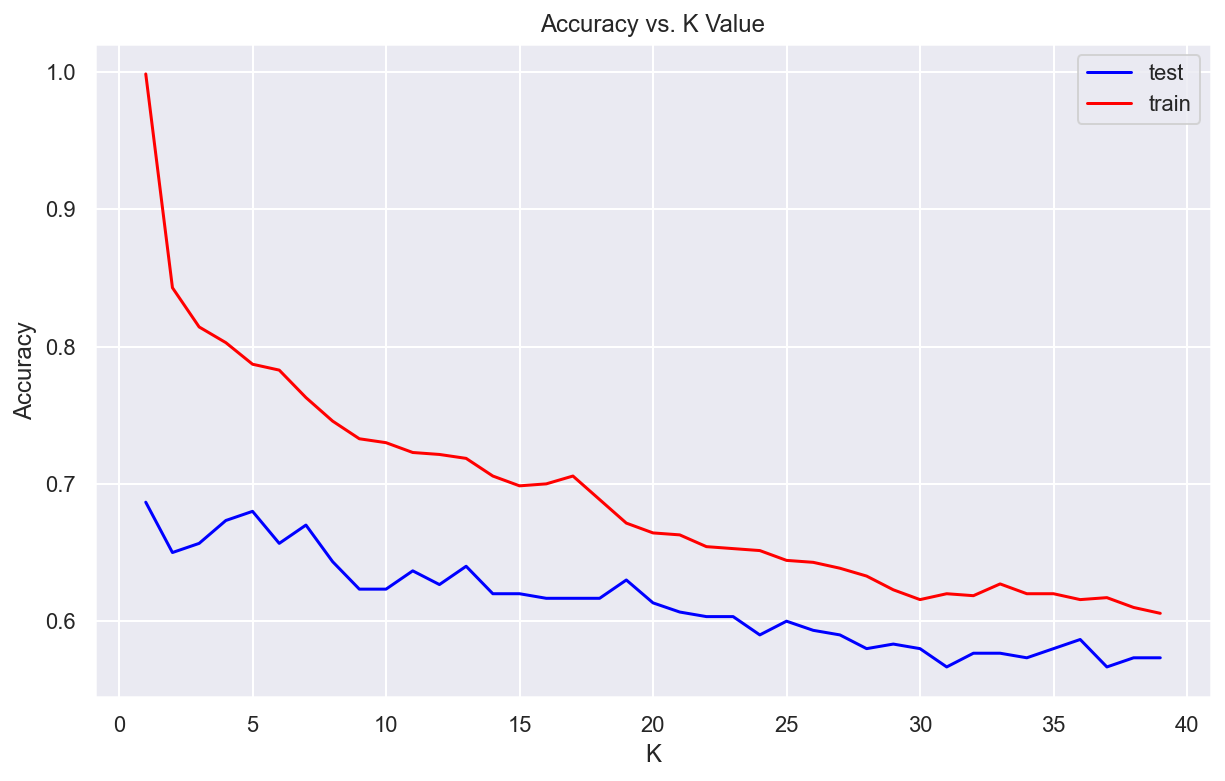

In [7]:
from sklearn import metrics
accuracy_test = []
accuracy_train = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_holdout_scaled)
    accuracy_test.append(metrics.accuracy_score(y_holdout, y_pred))

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled,y_train)
    y_pred_t = knn.predict(X_train_scaled)
    accuracy_train.append(metrics.accuracy_score(y_train, y_pred_t))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_test,color = 'blue',label='test')
plt.plot(range(1,40),accuracy_train,color = 'red',label='train')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_accuracy_test_train.png',dpi=600)


# Classification Report

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_holdout, knn_new.predict(X_holdout_scaled)))


              precision    recall  f1-score   support

           0       0.61      0.81      0.69        21
           1       0.82      0.90      0.86        31
           2       0.46      0.84      0.59        25
           3       0.39      0.46      0.42        26
           4       0.75      0.64      0.69        33
           5       0.86      0.53      0.65        34
           6       0.93      0.82      0.87        33
           7       0.84      0.79      0.81        33
           8       0.59      0.53      0.56        36
           9       0.65      0.46      0.54        28

    accuracy                           0.67       300
   macro avg       0.69      0.68      0.67       300
weighted avg       0.71      0.67      0.68       300



# SVM

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score


#splitting dataset before applying svm
X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3, random_state=17)

svm_pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf', random_state=5))])

svm_params = {'svm__C': [0.01, 0.1, 1, 10, 100, 1000],
              'svm__gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

svm_grid = GridSearchCV(svm_pipe, svm_params, cv=10, n_jobs=-1, verbose=True)
svm_grid.fit(X_train_scaled, y_train)
print(svm_grid.best_params_, svm_grid.best_score_)



Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'svm__C': 10, 'svm__gamma': 0.01} 0.7300000000000001


# SVM with optimized parameters

In [10]:
svm_new = svm.SVC(C=10,kernel='rbf', gamma=0.01)
svm_new.fit(X_train_scaled, y_train)
print('train accuaracy=',accuracy_score(y_train, svm_new.predict(X_train_scaled)) )
print('test accuaracy=',accuracy_score(y_holdout, svm_new.predict(X_holdout_scaled)) )

train accuaracy= 0.99
test accuaracy= 0.7566666666666667


# Accuracy vs C


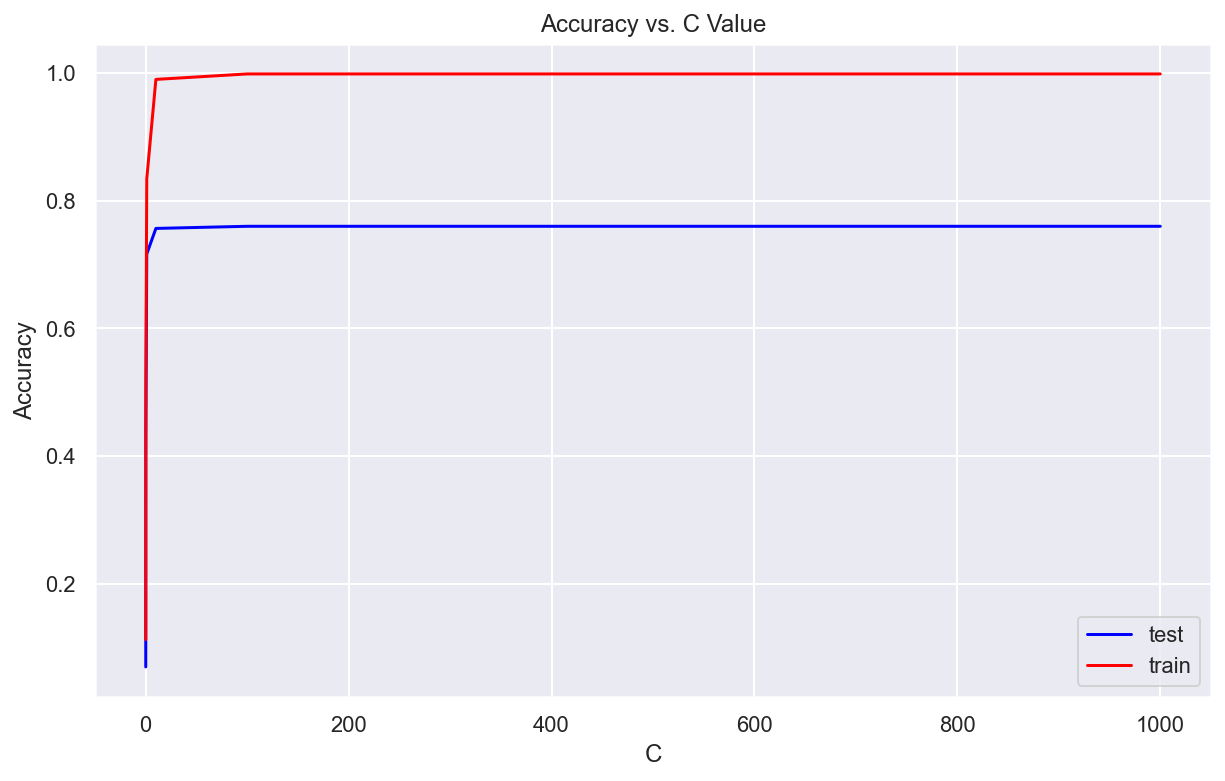

In [11]:
from sklearn import metrics
accuracy_test = []
accuracy_train = []
for i in ([0.01, 0.1, 1, 10, 100, 1000]):
    svm_1 = svm.SVC(C=i,kernel='rbf', gamma=0.01).fit(X_train_scaled,y_train)
    y_pred = svm_1.predict(X_holdout_scaled)
    accuracy_test.append(metrics.accuracy_score(y_holdout, y_pred))

for i in ([0.01, 0.1, 1, 10, 100, 1000]):
    svm_1 = svm.SVC(C=i,kernel='rbf', gamma=0.01).fit(X_train_scaled,y_train)
    y_pred_t = svm_1.predict(X_train_scaled)
    accuracy_train.append(metrics.accuracy_score(y_train, y_pred_t))
    
plt.figure(figsize=(10,6))
plt.plot([0.01, 0.1, 1, 10, 100, 1000],accuracy_test,color = 'blue',label='test')
plt.plot([0.01, 0.1, 1, 10, 100, 1000],accuracy_train,color = 'red',label='train')
plt.title('Accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('svm_accuracy_test_train_for_C.png',dpi=600)

# Accuracy vs Gamma

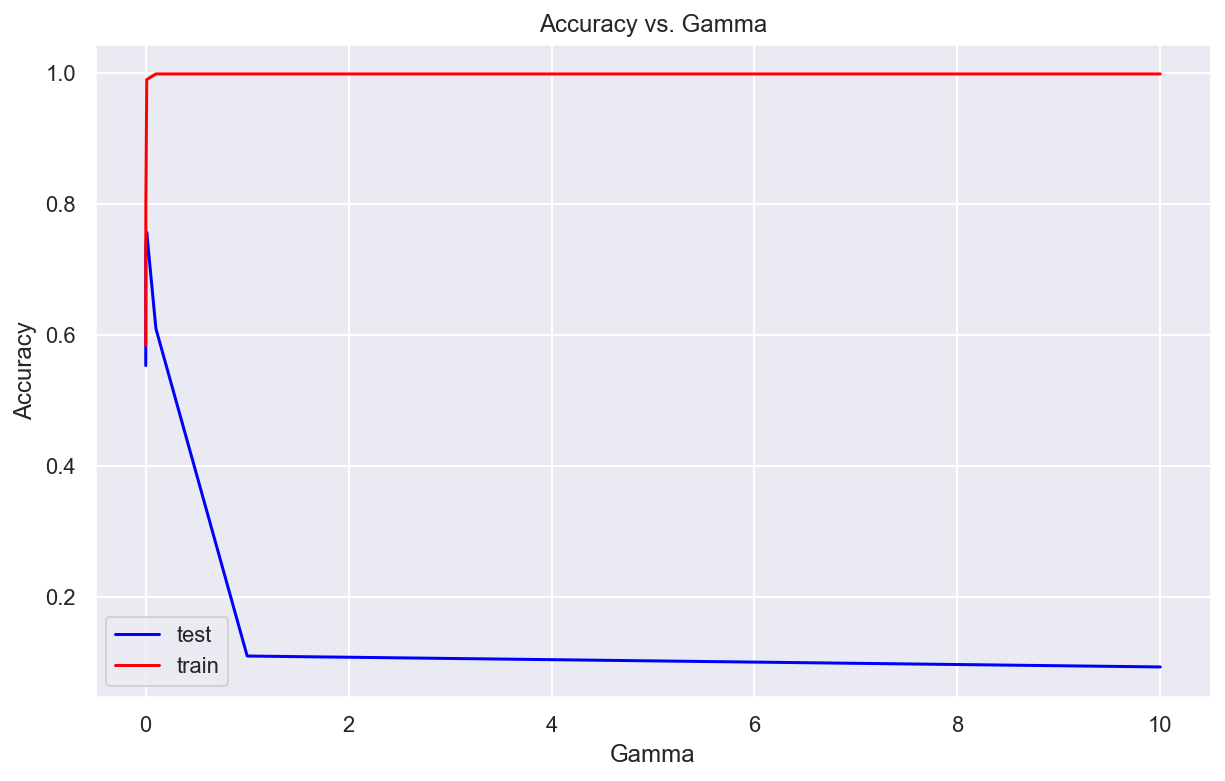

In [12]:
from sklearn import metrics
accuracy_test = []
accuracy_train = []
for i in ([1e-4, 1e-3, 1e-2, 1e-1, 1, 10]):
    svm_1 = svm.SVC(C=10,kernel='rbf', gamma=i).fit(X_train_scaled,y_train)
    y_pred = svm_1.predict(X_holdout_scaled)
    accuracy_test.append(metrics.accuracy_score(y_holdout, y_pred))

for i in ([1e-4, 1e-3, 1e-2, 1e-1, 1, 10]):
    svm_1 = svm.SVC(C=10,kernel='rbf', gamma=i).fit(X_train_scaled,y_train)
    y_pred_t = svm_1.predict(X_train_scaled)
    accuracy_train.append(metrics.accuracy_score(y_train, y_pred_t))
    
plt.figure(figsize=(10,6))
plt.plot([1e-4, 1e-3, 1e-2, 1e-1, 1, 10],accuracy_test,color = 'blue',label='test')
plt.plot([1e-4, 1e-3, 1e-2, 1e-1, 1, 10],accuracy_train,color = 'red',label='train')
plt.title('Accuracy vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('svm_accuracy_test_train_for_gamma.png',dpi=600)

# Classification Report For SVM

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_holdout, svm_new.predict(X_holdout_scaled)))

              precision    recall  f1-score   support

           0       0.59      0.90      0.72        21
           1       0.90      0.87      0.89        31
           2       0.79      0.76      0.78        25
           3       0.65      0.65      0.65        26
           4       0.76      0.79      0.78        33
           5       0.78      0.74      0.76        34
           6       0.85      0.88      0.87        33
           7       0.93      0.76      0.83        33
           8       0.69      0.61      0.65        36
           9       0.62      0.64      0.63        28

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.75       300
weighted avg       0.77      0.76      0.76       300

